In [14]:
#### Loading the packages to be used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import print_function  # Python 2 and 3
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
# show all output and more columns and rows
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 410
pd.options.display.max_rows = 2000

In [2]:
drug= pd.read_csv('drug.csv')
drug.head(1)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC11,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,logprice,price
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878


In [257]:
# only using columns from FDA
#['Explanation_Code']+['OTC']+['Classification_for_Rate_Setting']+
df=drug.loc[:,['DOSAGEFORMNAME']+['ROUTENAME'] +['LABELERNAME']+ ['STARTMARKETINGDATE']  + ['PHARM_CLASSES'] + ['MARKETINGCATEGORYNAME']+['DEASCHEDULE']+['logprice']+['price']]
df.shape
df.describe()

(13102, 9)

,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009666e+07,-1.188063,11.606463
std,7.176009e+04,2.003364,278.146418
min,1.900011e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [258]:
# imputation by mean
df.loc[df['STARTMARKETINGDATE']< 1.92e7,'STARTMARKETINGDATE']=2.009666e+07

In [259]:
df.head(2)
df.describe()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
0,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
1,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878


,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009674e+07,-1.188063,11.606463
std,7.111767e+04,2.003364,278.146418
min,1.947073e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [143]:
print (df['DOSAGEFORMNAME'].value_counts(dropna=False))   #print(drug['APPLICATIONNUMBER'].value_counts(dropna=False))

TABLET                                            7658
CAPSULE                                           1325
TABLET, EXTENDED RELEASE                           858
SOLUTION                                           371
CAPSULE, EXTENDED RELEASE                          345
CREAM                                              255
KIT                                                201
POWDER, FOR SOLUTION                               186
SOLUTION/ DROPS                                    165
SUSPENSION                                         159
TABLET, ORALLY DISINTEGRATING                      154
OINTMENT                                           150
TABLET, CHEWABLE                                   142
POWDER, FOR SUSPENSION                             134
CAPSULE, LIQUID FILLED                             101
GEL                                                 93
INJECTION, SOLUTION                                 87
INJECTION                                           60
CAPSULE, C

In [272]:
len(df.DOSAGEFORMNAME.unique())    # 80 categoriese

57

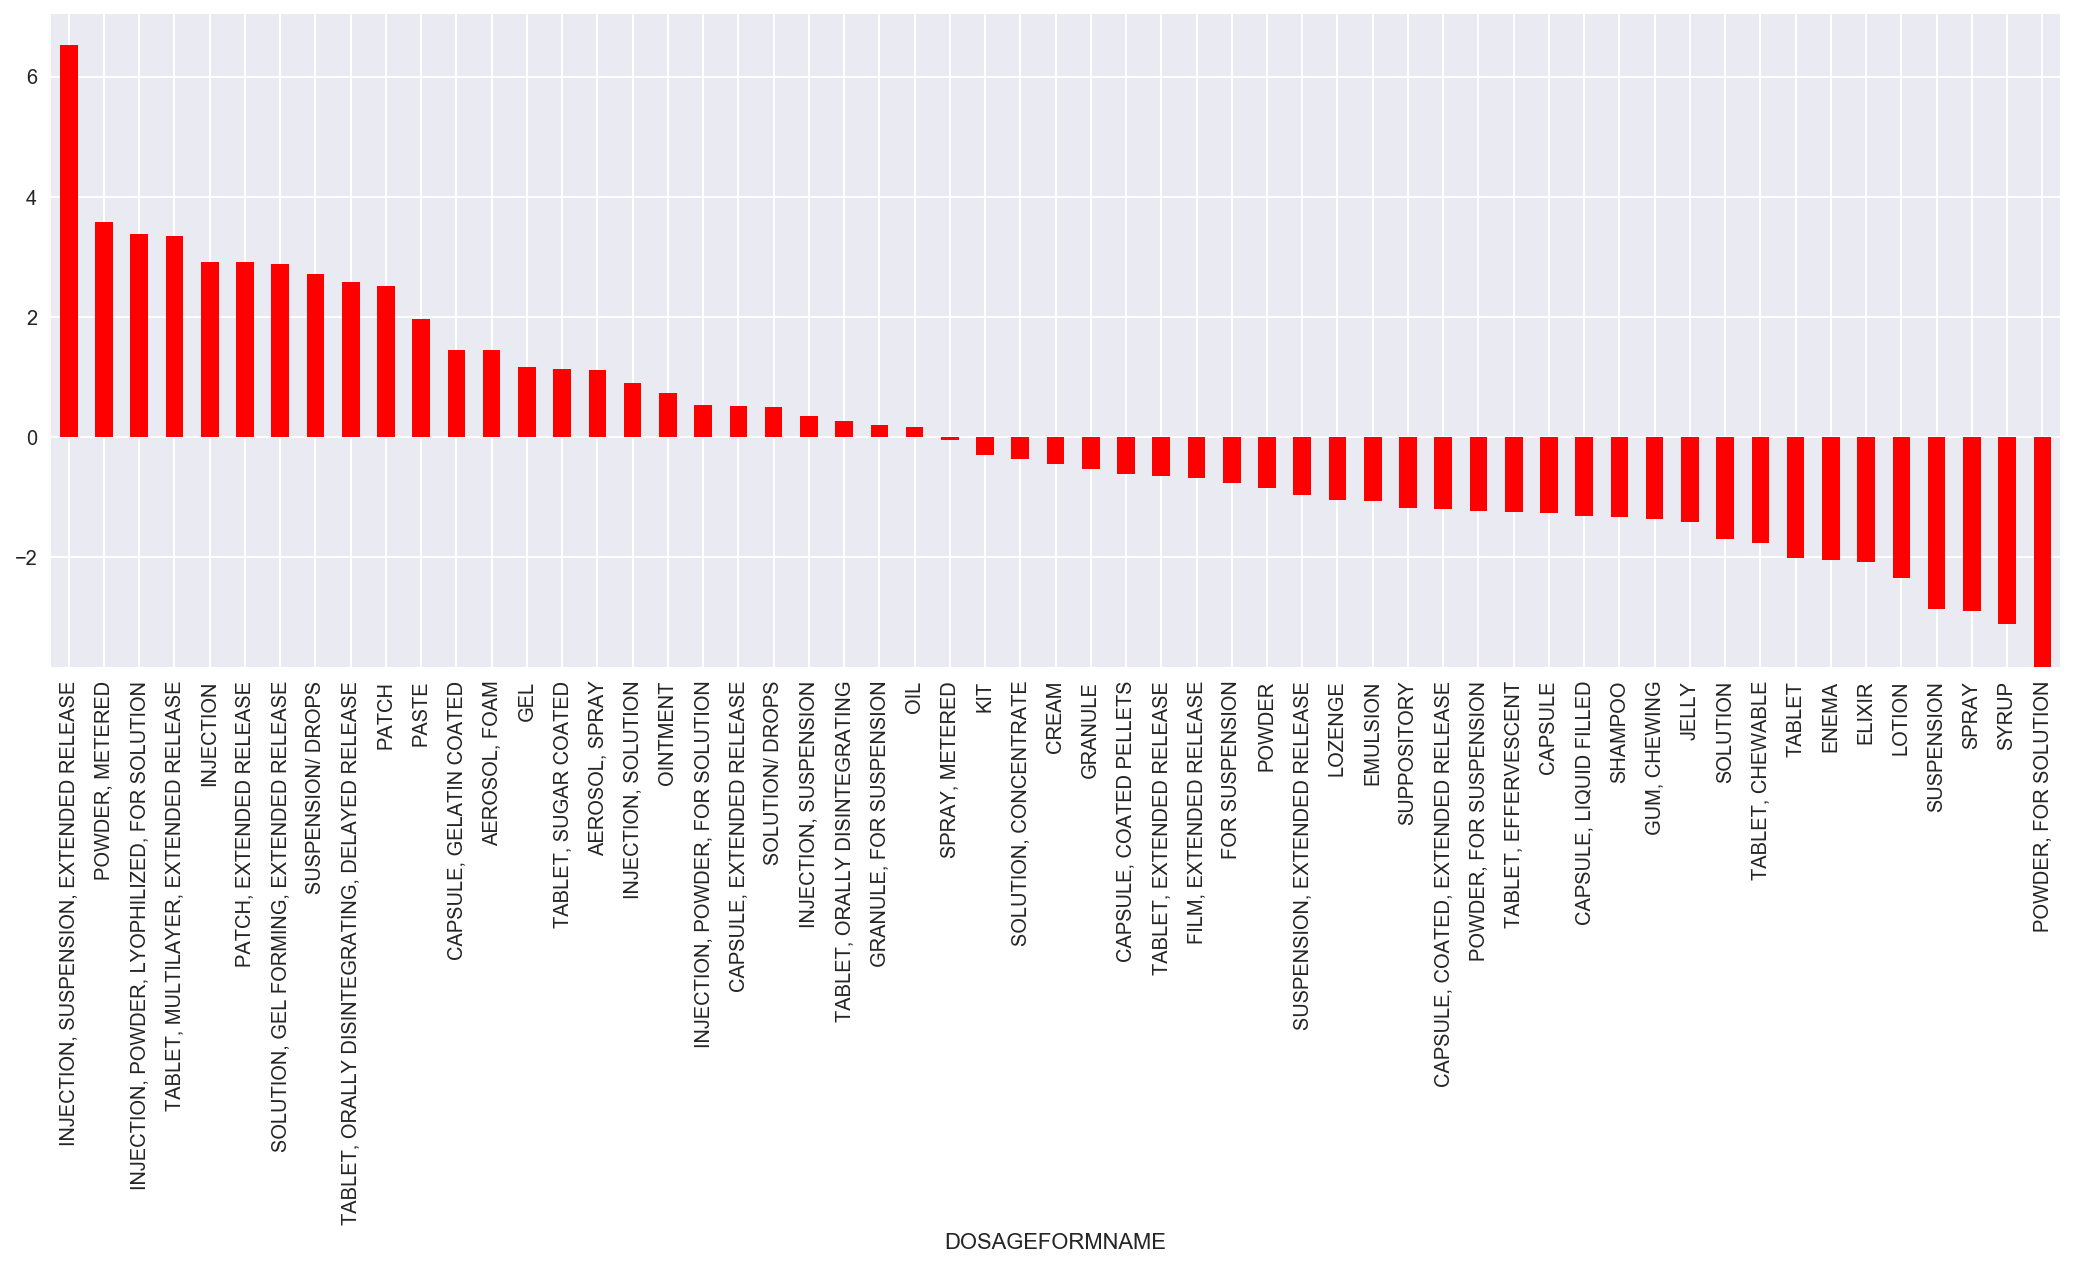

In [145]:
plt.figure(figsize=(18,6))
df.groupby('DOSAGEFORMNAME')['logprice'].median().sort_values(ascending=False).plot.bar(color='r')

In [146]:
df.groupby('DOSAGEFORMNAME')['price'].median().sort_values(ascending=False)

DOSAGEFORMNAME
INJECTION, SUSPENSION, EXTENDED RELEASE           681.881110
POWDER, METERED                                    35.987870
INJECTION, SUSPENSION                              34.973655
INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION       29.511670
TABLET, MULTILAYER, EXTENDED RELEASE               28.510760
INJECTION                                          18.540300
PATCH, EXTENDED RELEASE                            18.489050
SOLUTION, GEL FORMING, EXTENDED RELEASE            18.098760
SUSPENSION/ DROPS                                  15.090360
TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE     13.317260
PATCH                                              12.513320
PASTE                                               7.224395
CAPSULE, GELATIN COATED                             4.376350
AEROSOL, FOAM                                       4.257155
GEL                                                 3.210600
TABLET, SUGAR COATED                                3.132450
AEROSOL, 

In [52]:
D1=pd.DataFrame(df['DOSAGEFORMNAME'].value_counts(dropna=False),index= None)

In [73]:
D1= D1.reset_index(drop=True)

In [69]:
D1.index

RangeIndex(start=0, stop=80, step=1)

In [61]:
D1.rename(columns={'index': 'dose', 'DOSAGEFORMNAME': 'count'}, inplace=True)

In [30]:
D2= pd.DataFrame(df.groupby('DOSAGEFORMNAME')['logprice'].median().sort_values(ascending=False))

In [75]:
D2.rename(columns={'DOSAGEFORMNAME': 'dose'}, inplace=True)

In [70]:
D2= D2.reset_index(drop=False)

In [71]:
D2.index

RangeIndex(start=0, stop=80, step=1)

In [78]:
D1.head(3) ; D2.head(3)
D1.shape,D2.shape

,index,dose,count
0,0,TABLET,4583
1,1,"TABLET, FILM COATED",2722
2,2,CAPSULE,1089


,dose,logprice
0,"INJECTION, SUSPENSION, EXTENDED RELEASE",6.524855
1,"POWDER, METERED",3.932549
2,"INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION",3.384786


((80, 3), (80, 2))

In [80]:
D3=pd.merge(D1,D2, on='dose',how='inner')

In [82]:
D3.to_csv('Doseage.csv',index=0)

In [260]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, FILM COATED','DOSAGEFORMNAME']= 'TABLET'

In [261]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, FILM COATED, EXTENDED RELEASE','DOSAGEFORMNAME']= 'TABLET, EXTENDED RELEASE'
df.loc[df['DOSAGEFORMNAME']== 'CAPSULE, DELAYED RELEASE','DOSAGEFORMNAME']= 'CAPSULE'

#TABLET: TABLET, FILM COATED, EXTENDED RELEASE,TABLET, COATED, TABLET, DELAYED RELEASE
#CAPSULE: DELAYED RELEASE, CAPSULE, DELAYED RELEASE PELLETS

#POWDER, FOR SOLUTION:LUQUID

#SUSPENSION: FOR SOLUTION,CREAM, AUGMENTED, GEL, DENTIFRICE, SHAMPOO, SUSPENSION
#SOLUTION:RINSE, SOLUTION, GEL FORMING / DROPS
#TABLET, CHEWABLE:TABLET, FOR SUSPENSION

#POWDER, FOR SUSPENSION: GRANULE, FOR SOLUTION

#POWDER: FOR SUSPENSION
#CONCENTRATE	SOLUTION, CONCENTRATE	
#AEROSOL, METERED	POWDER, METERED	
		
	#PASTE	SWAB,PELLET	FILM	
	
		
#AEROSOL, SPRAY	TINCTURE	
#KIT	TABLET, MULTILAYER	


In [262]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, COATED','DOSAGEFORMNAME']= 'TABLET'
df.loc[df['DOSAGEFORMNAME']== 'LIQUID','DOSAGEFORMNAME']= 'POWDER, FOR SOLUTION'
df.loc[df['DOSAGEFORMNAME']== 'AEROSOL, POWDER','DOSAGEFORMNAME']= 'POWDER, FOR SOLUTION'
df.loc[df['DOSAGEFORMNAME']== 'FOR SOLUTION','DOSAGEFORMNAME']= 'SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'CREAM, AUGMENTED','DOSAGEFORMNAME']= 'SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'GEL, DENTIFRICE','DOSAGEFORMNAME']= 'SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'SHAMPOO, SUSPENSION','DOSAGEFORMNAME']= 'SUSPENSION'

In [263]:
df.loc[df['DOSAGEFORMNAME']== 'TABLET, DELAYED RELEASE','DOSAGEFORMNAME']= 'TABLET'
df.loc[df['DOSAGEFORMNAME']== 'GEL FORMING / DROPS','DOSAGEFORMNAME']= 'SOLUTION'

df.loc[df['DOSAGEFORMNAME']== 'SOLUTION, GEL FORMING / DROPS','DOSAGEFORMNAME']= 'SOLUTION'

df.loc[df['DOSAGEFORMNAME']== 'RINSE','DOSAGEFORMNAME']= 'SOLUTION'
df.loc[df['DOSAGEFORMNAME']== 'CAPSULE, DELAYED RELEASE PELLETS','DOSAGEFORMNAME']= 'CAPSULE'
df.loc[df['DOSAGEFORMNAME']== 'TABLET, FOR SUSPENSION','DOSAGEFORMNAME']= 'TABLET, CHEWABLE'
df.loc[df['DOSAGEFORMNAME']== 'GRANULE, FOR SOLUTION','DOSAGEFORMNAME']= 'POWDER, FOR SUSPENSION'
df.loc[df['DOSAGEFORMNAME']== 'CONCENTRATE','DOSAGEFORMNAME']= 'SOLUTION, CONCENTRATE'
df.loc[df['DOSAGEFORMNAME']== 'AEROSOL, METERED','DOSAGEFORMNAME']= 'POWDER, METERED'
df.loc[df['DOSAGEFORMNAME']== 'TINCTURE','DOSAGEFORMNAME']= 'AEROSOL, SPRAY'
df.loc[df['DOSAGEFORMNAME']== 'TABLET, MULTILAYER','DOSAGEFORMNAME']= 'KIT'

In [264]:
df.loc[df['DOSAGEFORMNAME'] ==('SWAB'),'DOSAGEFORMNAME']= 'PASTE'
df.loc[df['DOSAGEFORMNAME'] ==('FILM'),'DOSAGEFORMNAME']= 'PASTE'
df.loc[df['DOSAGEFORMNAME'] ==('PELLET'),'DOSAGEFORMNAME']= 'PASTE'


In [235]:
df.to_csv('drugFE.csv',index=0)

In [236]:
print (df['ROUTENAME'].value_counts(dropna=False))  

ORAL                                                                       11523
TOPICAL                                                                      653
OPHTHALMIC                                                                   253
NaN                                                                          164
TRANSDERMAL                                                                   96
SUBCUTANEOUS                                                                  53
NASAL                                                                         50
RESPIRATORY (INHALATION)                                                      36
INTRAMUSCULAR; INTRAVENOUS                                                    36
INTRAMUSCULAR                                                                 35
RECTAL                                                                        31
AURICULAR (OTIC)                                                              23
INTRAVENOUS                 

In [237]:
df.groupby('ROUTENAME')['price'].median().sort_values(ascending=False)

ROUTENAME
BUCCAL; SUBLINGUAL                                                         109.105480
SUBCUTANEOUS                                                                87.093890
INTRAMUSCULAR                                                               70.823980
INTRADERMAL                                                                 61.195695
INTRAMUSCULAR; SUBCUTANEOUS                                                 22.039400
INTRAVENOUS; SUBCUTANEOUS                                                   14.068800
TRANSDERMAL                                                                 13.310450
INTRAVENOUS                                                                 13.242000
ORAL; TRANSMUCOSAL                                                          12.751670
AURICULAR (OTIC)                                                             7.619750
BUCCAL                                                                       7.458740
SUBLINGUAL                                  

In [164]:
R1=pd.DataFrame(df['ROUTENAME'].value_counts(dropna=False),index= None)
R1.head(2)

,ROUTENAME
ORAL,11523
TOPICAL,653


In [165]:
R2=pd.DataFrame(df.groupby('ROUTENAME')['logprice'].median().sort_values(ascending=False))
R2.head(2)

,logprice
ROUTENAME,
BUCCAL; SUBLINGUAL,4.692315
SUBCUTANEOUS,4.466987


In [166]:
R1= R1.reset_index(drop=False)
R2= R2.reset_index(drop=False)

In [171]:
R1.head();R2.head()

,route,count
0,ORAL,11523
1,TOPICAL,653
2,OPHTHALMIC,253
3,NaN,164
4,TRANSDERMAL,96


,route,logprice
0,BUCCAL; SUBLINGUAL,4.692315
1,SUBCUTANEOUS,4.466987
2,INTRAMUSCULAR,4.260198
3,INTRADERMAL,4.106116
4,INTRAMUSCULAR; SUBCUTANEOUS,3.092832


In [168]:
R1.rename(columns={'index': 'route', 'ROUTENAME':'count'}, inplace=True)


In [170]:
R2.rename(columns={'count': 'route'}, inplace=True)

In [172]:
R3=pd.merge(R1,R2, on='route',how='inner')
R3.shape


(38, 3)

In [175]:
R3.to_csv('ROUTE.csv',index=0)

In [265]:
df.loc[df['ROUTENAME']== 'ORAL; ORAL','ROUTENAME']= 'ORAL'

df.loc[df['ROUTENAME']== 'ORAL; SUBLINGUAL','ROUTENAME']= 'ORAL'

df.loc[df['ROUTENAME']== 'INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE','ROUTENAME']= 'ORAL; TOPICAL'
df.loc[df['ROUTENAME']== 'INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE','ROUTENAME']= 'ORAL; TOPICAL'

df.loc[df['ROUTENAME']== 'OPHTHALMIC; TOPICAL','ROUTENAME']= 'TOPICAL'

df.loc[df['ROUTENAME']== 'PERINEURAL','ROUTENAME']= 'DENTAL'

df.loc[df['ROUTENAME']== 'ENTERAL','ROUTENAME']= 'RECTAL; TOPICAL'
#RECTAL; TOPICAL,   ENTERAL
#ORAL: ORAL; SUBLINGUAL

#PERINEURAL
#INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE
#INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE
#ORAL; TOPICAL


#TOPICAL ,OPHTHALMIC; TOPICAL

In [273]:
len(df.ROUTENAME.unique())    # 39 categories

32

In [267]:
df.loc[df.ROUTENAME=='CUTANEOUS']

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
4053,SPRAY,CUTANEOUS,AmerisourceBergen Drug Corporation,20111028.0,NaN,OTC MONOGRAPH NOT FINAL,NaN,-3.705009,0.02460
4064,LOTION,CUTANEOUS,AmerisourceBergen Drug Corporation,20130128.0,NaN,OTC MONOGRAPH NOT FINAL,NaN,-4.312501,0.01340
6385,LOTION,CUTANEOUS,STI Pharma,19850731.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",ANDA,NaN,-0.311114,0.73263
8489,PATCH,CUTANEOUS,Endo Pharmaceuticals Inc.,19990320.0,"Amide Local Anesthetic [EPC],Amides [Chemical/...",NDA,NaN,2.482786,11.97458


In [242]:
df.to_csv('drugFE.csv',index=0)

In [268]:
len(df.PHARM_CLASSES.unique())
len(df.MARKETINGCATEGORYNAME.unique())

420

8

In [244]:
df.head()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
1,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
2,SOLUTION,TOPICAL,Pharmacia and Upjohn Company LLC,19800620.0,"Decreased Sebaceous Gland Activity [PE],Lincos...",NDA,NaN,-1.748125,0.17410
3,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20030101.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381
4,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20161201.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381


In [246]:
df.describe()

,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009674e+07,-1.188063,11.606463
std,7.111767e+04,2.003364,278.146418
min,1.947073e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [270]:
df.groupby('MARKETINGCATEGORYNAME')['price'].median().sort_values(ascending=False)


MARKETINGCATEGORYNAME
BLA                        943.59937
NDA                          7.89226
NDA AUTHORIZED GENERIC       2.00555
UNAPPROVED DRUG OTHER        0.40339
ANDA                         0.18912
OTC MONOGRAPH FINAL          0.04977
OTC MONOGRAPH NOT FINAL      0.02258
Name: price, dtype: float64

In [271]:
print (df['MARKETINGCATEGORYNAME'].value_counts(dropna=False))  

ANDA                       10343
NDA                         1173
OTC MONOGRAPH FINAL          559
NDA AUTHORIZED GENERIC       482
OTC MONOGRAPH NOT FINAL      353
UNAPPROVED DRUG OTHER        163
BLA                           29
Name: MARKETINGCATEGORYNAME, dtype: int64


In [269]:
df.loc[df['MARKETINGCATEGORYNAME']== 'UNAPPROVED OTHER','MARKETINGCATEGORYNAME']= 'UNAPPROVED DRUG OTHER'

In [274]:
df.to_csv('drugFE.csv',index=0)

In [389]:
df=pd.read_csv('drugFE.csv')

In [387]:
df.groupby('class')['price'].median().sort_values(ascending=False)

class
Interleukin-12 Antagonist [EPC],Interleukin-12 Antagonists [MoA],Interleukin-23 Antagonist [EPC],Interleukin-23 Antagonists [MoA]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            18242.025645
Granulocyte Colony-Stimulating Factor [Chemical/Ingredient],Granulocyte-Macrophage Colony-Stimulating Factor [Chemical/Ingredient],Increased Myeloid Cell Production [PE],Leukocyte Growth Factor [EPC]                 

In [406]:
print (df['PHARM_CLASSES'].value_counts(dropna=False))  

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          2264
Atypical Antipsychotic [EPC]                                                                                                                                                                                                          

In [321]:
P1=pd.DataFrame(df['PHARM_CLASSES'].value_counts(dropna=False))

In [329]:
P2=pd.DataFrame(df.groupby('PHARM_CLASSES')['logprice'].median().sort_values(ascending=False))

In [332]:
P1.rename(columns={'index': 'class', 'PHARM_CLASSES':'count'}, inplace=True)
P2.rename(columns={'PHARM_CLASSES': 'class'}, inplace=True)

In [335]:
P3=pd.merge(P1,P2, on='class', how='inner')


In [336]:
P3.to_csv('pharmclass.csv',index=0)

In [337]:
P3.head()

,level_0,class,count,logprice
0,1,Atypical Antipsychotic [EPC],533,-1.026720
1,2,"Serotonin Reuptake Inhibitor [EPC],Serotonin U...",380,-2.519374
2,3,"HMG-CoA Reductase Inhibitor [EPC],Hydroxymethy...",353,-2.254367
3,4,"Full Opioid Agonists [MoA],Opioid Agonist [EPC]",347,-0.917742
4,5,"Cyclooxygenase Inhibitors [MoA],Nonsteroidal A...",301,-2.837703


In [446]:
len(df.PHARM_CLASSES.unique())
len(df.MARKETINGCATEGORYNAME.unique())

398

7

In [330]:
P1= P1.reset_index(drop=False)
P2= P2.reset_index(drop=False)

In [434]:
df.loc[df['PHARM_CLASSES']== 'Phenothiazine [EPC],Phenothiazines [Chemical/Ingredient],Full Opioid Agonists [MoA],Opioid Agonist [EPC]','PHARM_CLASSES']= 'EPC'
df.loc[df['PHARM_CLASSES']== 'Full Opioid Agonists [MoA],Opioid Agonist [EPC],Phenothiazine [EPC],Phenothiazines [Chemical/Ingredient]','PHARM_CLASSES']= 'EPC'
df.loc[df['PHARM_CLASSES']== 'Uncompetitive N-methyl-D-aspartate Receptor Antagonist [EPC],Sigma-1 Agonist [EPC],Uncompetitive NMDA Receptor Antagonists [MoA],Sigma-1 Receptor Agonists [MoA],Phenothiazine [EPC],Phenothiazines [Chemical/Ingredient','PHARM_CLASSES']= 'EPC'
df.loc[df['PHARM_CLASSES']== 'Phenothiazine [EPC],Phenothiazines [Chemical/Ingredient],Uncompetitive N-methyl-D-aspartate Receptor Antagonist [EPC],Sigma-1 Agonist [EPC],Uncompetitive NMDA Receptor Antagonists [MoA],Sigma-1 Receptor Agonists [MoA]','PHARM_CLASSES']= 'EPC'
df.loc[df['PHARM_CLASSES']== 'Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Decreased Cell Wall Integrity [PE]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Laxative [EPC],Osmotic Activity [MoA],Acidifying Activity [MoA],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Osmotic'
df.loc[df['PHARM_CLASSES']== 'Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Osmotic'

In [444]:
df.loc[df['PHARM_CLASSES']== 'Increased Diuresis [PE],Thiazide Diuretic [EPC],Thiazides [Chemical/Ingredient],Angiotensin Converting Enzyme Inhibitor [EPC],Angiotensin-converting Enzyme Inhibitors [MoA]','PHARM_CLASSES']= 'Increased Diuresis'
df.loc[df['PHARM_CLASSES']== 'Increased Diuresis at Loop of Henle [PE],Loop Diuretic [EPC]','PHARM_CLASSES']= 'Increased Diuresis'
df.loc[df['PHARM_CLASSES']== 'Increased Diuresis [PE],Thiazide Diuretic [EPC],Thiazides [Chemical/Ingredient]','PHARM_CLASSES']= 'Increased Diuresis'

df.loc[df['PHARM_CLASSES']== 'Anticholinergic [EPC],Cholinergic Antagonists [MoA],Adrenergic beta2-Agonists [MoA],beta2-Adrenergic Agonist [EPC]','PHARM_CLASSES']= 'Adrenergic beta2'
df.loc[df['PHARM_CLASSES']== 'Adrenergic beta2-Agonists [MoA],beta2-Adrenergic Agonist [EPC],Anticholinergic [EPC],Cholinergic Antagonists [MoA]','PHARM_CLASSES']= 'Adrenergic beta2'


df.loc[df['PHARM_CLASSES']== 'Fatty Acids, Omega-3 [Chemical/Ingredient],Omega-3 Fatty Acid [EPC],Vitamin B6 Analog [EPC],Vitamin B 6 [Chemical/Ingredient],Analogs/Derivatives [Chemical/Ingredient],Vitamin B 12 [Chemical/Ingredient],Vitamin B12 [EPC],Vitamin D [Chemical/Ingredient],Vitamin D [EPC],Copper Absorption Inhibitor [EPC],Decreased Copper Ion Absorption [PE]','PHARM_CLASSES']= 'Omega3'
df.loc[df['PHARM_CLASSES']== 'Fatty Acids, Omega-3 [Chemical/Ingredient],Omega-3 Fatty Acid [EPC],Vitamin B6 Analog [EPC],Vitamin B 6 [Chemical/Ingredient],Analogs/Derivatives [Chemical/Ingredient],Vitamin B 12 [Chemical/Ingredient],Vitamin B12 [EPC],Vitamin D [Chemical/Ingredient],Vitamin D [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]','PHARM_CLASSES']= 'Omega3'

df.loc[df['PHARM_CLASSES']== 'Vitamin B6 Analog [EPC],Vitamin B 6 [Chemical/Ingredient],Analogs/Derivatives [Chemical/Ingredient],Vitamin B 12 [Chemical/Ingredient],Vitamin B12 [EPC],Copper [Chemical/Ingredient],Copper-containing Intrauterine Device [EPC],Decreased Embryonic Implantation [PE],Decreased Sperm Motility [PE],Inhibit Ovum Fertilization [PE]','PHARM_CLASSES']= 'Vitamin6'
df.loc[df['PHARM_CLASSES']== 'Nicotinic Acid [EPC],Nicotinic Acids [Chemical/Ingredient],Vitamin B6 Analog [EPC],Vitamin B 6 [Chemical/Ingredient],Analogs/Derivatives [Chemical/Ingredient],Vitamin B 12 [Chemical/Ingredient],Vitamin B12 [EPC],Copper Absorption Inhibitor [EPC],Decreased Copper Ion Absorption [PE],Copper [Chemical/Ingredient],Copper-containing Intrauterine Device [EPC],Decreased Embryonic Implantation [PE],Decreased Sperm Motility [PE],Inhibit Ovum Fertilization [PE]','PHARM_CLASSES']= 'Vitamin6'

df.loc[df['PHARM_CLASSES']== 'Full Opioid Agonists [MoA],Opioid Agonist [EPC],Cyclooxygenase Inhibitors [MoA],Decreased Prostaglandin Production [PE],Nonsteroidal Anti-inflammatory Compounds [Chemical/Ingredient],Nonsteroidal Anti-inflammatory Drug [EPC],Platelet Aggregation Inhibitor [EPC],Decreased Platelet Aggregation [PE]','PHARM_CLASSES']= 'local'
df.loc[df['PHARM_CLASSES']== 'Polymyxin-class Antibacterial [EPC],Polymyxins [Chemical/Ingredient],Dihydrofolate Reductase Inhibitor Antibacterial [EPC],Dihydrofolate Reductase Inhibitors [MoA],Cytochrome P450 2C8 Inhibitors [MoA],Organic Cation Transporter 2 Inhibitors [MoA]','PHARM_CLASSES']= 'local'
df.loc[df['PHARM_CLASSES']== 'Dihydrofolate Reductase Inhibitor Antibacterial [EPC],Dihydrofolate Reductase Inhibitors [MoA],Cytochrome P450 2C8 Inhibitors [MoA],Organic Cation Transporter 2 Inhibitors [MoA],Polymyxin-class Antibacterial [EPC],Polymyxins [Chemical/Ingredient]','PHARM_CLASSES']= 'local'
df.loc[df['PHARM_CLASSES']== 'Ester Local Anesthetic [EPC],Esters [Chemical/Ingredient],Local Anesthesia [PE]','PHARM_CLASSES']= 'local'
df.loc[df['PHARM_CLASSES']== 'Amide Local Anesthetic [EPC],Amides [Chemical/Ingredient],Antiarrhythmic [EPC],Local Anesthesia [PE],Amide Local Anesthetic [EPC],Amides [Chemical/Ingredient],Local Anesthesia [PE]','PHARM_CLASSES']= 'local'
df.loc[df['PHARM_CLASSES']== 'Decreased Renal K+ Excretion [PE],Increased Diuresis [PE],Potassium-sparing Diuretic [EPC]','PHARM_CLASSES']= 'local'
df.loc[df['PHARM_CLASSES']== 'Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Vitamin B6 Analog [EPC],Vitamin B 6 [Chemical/Ingredient],Analogs/Derivatives [Chemical/Ingredient],Vitamin B 12 [Chemical/Ingredient],Vitamin B12 [EPC],Copper [Chemical/Ingredient],Copper-containing Intrauterine Device [EPC],Decreased Embryonic Implantation [PE],Decreased Sperm Motility [PE],Inhibit Ovum Fertilization [PE]','PHARM_CLASSES']= 'local'

In [445]:
df.loc[df.PHARM_CLASSES=='local']







,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
1400,SOLUTION,OPHTHALMIC,"Akorn, Inc.",19981217.0,local,ANDA,NaN,-0.554969,0.57409
1616,CAPSULE,ORAL,Centurion Labs,20090614.0,local,UNAPPROVED DRUG OTHER,NaN,-0.776029,0.46023
1617,CAPSULE,ORAL,Centurion Labs,20090614.0,local,UNAPPROVED DRUG OTHER,NaN,-0.776029,0.46023
1647,SOLUTION/ DROPS,OPHTHALMIC,Bausch & Lomb Incorporated,19970214.0,local,ANDA,NaN,-0.554969,0.57409
1708,SOLUTION,OPHTHALMIC,Bausch & Lomb Incorporated,19900930.0,local,UNAPPROVED DRUG OTHER,NaN,-0.574227,0.56314
4662,TABLET,ORAL,Par Pharmaceutical Inc.,19860122.0,local,ANDA,NaN,-0.742127,0.47610
4663,TABLET,ORAL,Par Pharmaceutical Inc.,19860122.0,local,ANDA,NaN,-0.742127,0.47610
5031,CREAM,TOPICAL,"Hi-Tech Pharmacal Co., Inc.",20030925.0,local,ANDA,NaN,-0.605484,0.54581
7541,SOLUTION/ DROPS,OPHTHALMIC,"Pacific Pharma, Inc.",19970429.0,local,NDA AUTHORIZED GENERIC,NaN,-0.554969,0.57409
7632,SOLUTION,OPHTHALMIC,"Falcon Pharmaceuticals, Ltd.",19980416.0,local,ANDA,NaN,-0.554969,0.57409


In [366]:
a=pd.read_csv('a.CSV')

In [371]:
a['C']=a["A"].replace(to_replace={"ad",'e'}, value="2", regex=True) 

In [448]:
df.describe()

,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009674e+07,-1.188063,11.606463
std,7.111767e+04,2.003364,278.146418
min,1.947073e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [ ]:
#Osmotic#Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE]
#Decreased Cell Wall Integrity [PE]


#Osmotic Laxative [EPC],Osmotic Activity [MoA],Acidifying Activity [MoA],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE]


#Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]
#Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]
#Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]
#Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]
#Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]
#Osmotic Activity [MoA],Osmotic Laxative [EPC],Stimulation Large Intestine Fluid/Electrolyte Secretion [PE],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Potassium Compounds [Chemical/Ingredient],Potassium Salt [EPC],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA],Osmotic Laxative [EPC],Increased Large Intestinal Motility [PE],Inhibition Large Intestine Fluid/Electrolyte Absorption [PE],Osmotic Activity [MoA]

In [447]:
df.to_csv('drugFEP.csv',index=0)

## Try linear regression

In [242]:
df=pd.read_csv('drugFEP.csv')

In [243]:

#df=df.drop('price')
df=df.iloc[:,:-1]
df.head(1)

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075


In [244]:
def Dummify(column):
    column_values = pd.get_dummies(df[column], prefix=column, prefix_sep='__')
    return pd.concat([df.drop(column,axis=1),column_values],axis=1)

df = Dummify('DOSAGEFORMNAME')
df = Dummify('ROUTENAME')
#df.head(2)
df = Dummify('MARKETINGCATEGORYNAME')
#df.head(2)
df = Dummify('PHARM_CLASSES')
#df.head(2)
df = Dummify('DEASCHEDULE')
df=Dummify('LABELERNAME')
#df=Dummify('Classification_for_Rate_Setting')
#df=Dummify('OTC')
#df=Dummify('Explanation_Code')
df.head(2)

,STARTMARKETINGDATE,logprice,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CREAM,DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__SHAMPOO,DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SUGAR COATED",ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRADERMAL,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SUBLINGUAL,ROUTENAME__TOPICAL,ROUTENAME__TRANSDERMAL,ROUTENAME__VAGINAL,MARKETINGCATEGORYNAME__ANDA,MARKETINGCATEGORYNAME__BLA,MARKETINGCATEGORYNAME__NDA,MARKETINGCATEGORYNAME__NDA AUTHORIZED GENERIC,MARKETINGCATEGORYNAME__OTC MONOGRAPH FINAL,MARKETINGCATEGORYNAME__OTC MONOGRAPH NOT FINAL,MARKETINGCATEGORYNAME__UNAPPROVED DRUG OTHER,"PHARM_CLASSES__5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase Inhibitors [MoA],Decreased Leukotriene Production [PE]","PHARM_CLASSES__5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA]","PHARM_CLASSES__5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA],Adrenergic alpha-Antagonists [MoA],alpha-Adrenergic Blocker [EPC]","PHARM_CLASSES__Acetyl Aldehyde Dehydrogenase Inhibitors [MoA],Aldehyde Dehydrogenase Inhibitor [EPC]","PHARM_CLASSES__Acidifying Activity [MoA],Calculi Dissolution Agent [EPC],Anti-coagulant [EPC],Decreased Coagulation Factor Activity [PE],Calcium Chelating Activity [MoA]","PHARM_CLASSES__Adrenergic Agonists [MoA],Adrenergic Receptor Agonist [EPC],Decreased Histamine Release [PE],Histamine H1 Receptor Antagonists [MoA],Histamine-1 Receptor In

In [245]:
y = df["logprice"]
x = df.loc[:, df.columns != 'logprice']



In [246]:
x.shape

(13102, 1086)

In [247]:
from sklearn import linear_model
ols = linear_model.LinearRegression()


In [248]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

(array([ 0.00211517,  0.07408255,  0.20398496,  0.16890409,  0.09317067,
         0.05143475,  0.01047267,  0.00263107,  0.00113497,  0.00036113]),
 array([-6.63012354, -4.98617628, -3.34222901, -1.69828175, -0.05433449,
         1.58961278,  3.23356004,  4.87750731,  6.52145457,  8.16540184,
         9.8093491 ]),
 <a list of 10 Patch objects>)

(array([ 0.01902117,  0.14290266,  0.21606102,  0.12973416,  0.08242508,
         0.0414564 ,  0.00634039,  0.00048772,  0.00048772,  0.00048772]),
 array([-5.82595011, -4.2619938 , -2.69803749, -1.13408118,  0.42987513,
         1.99383144,  3.55778774,  5.12174405,  6.68570036,  8.24965667,
         9.81361298]),
 <a list of 10 Patch objects>)

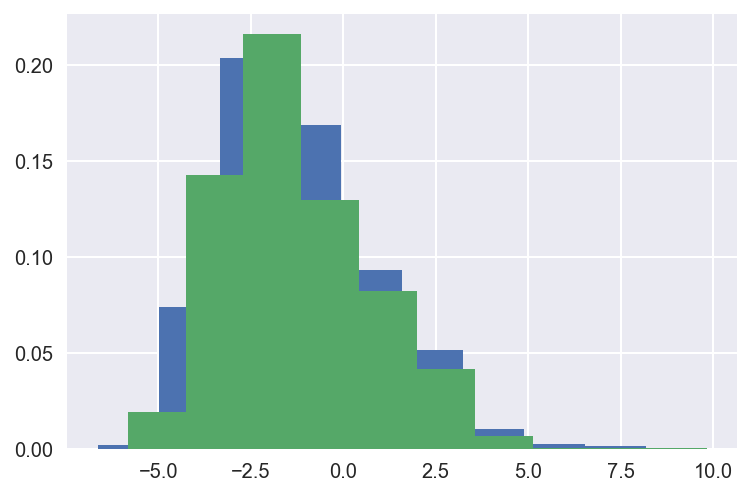

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, normed=True)
plt.hist(y_test, normed=True)

In [250]:
regression = ols.fit(X_train, y_train)

In [251]:
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.797281
--------------------------------------------------
R^2 for test  set: 0.752870


try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

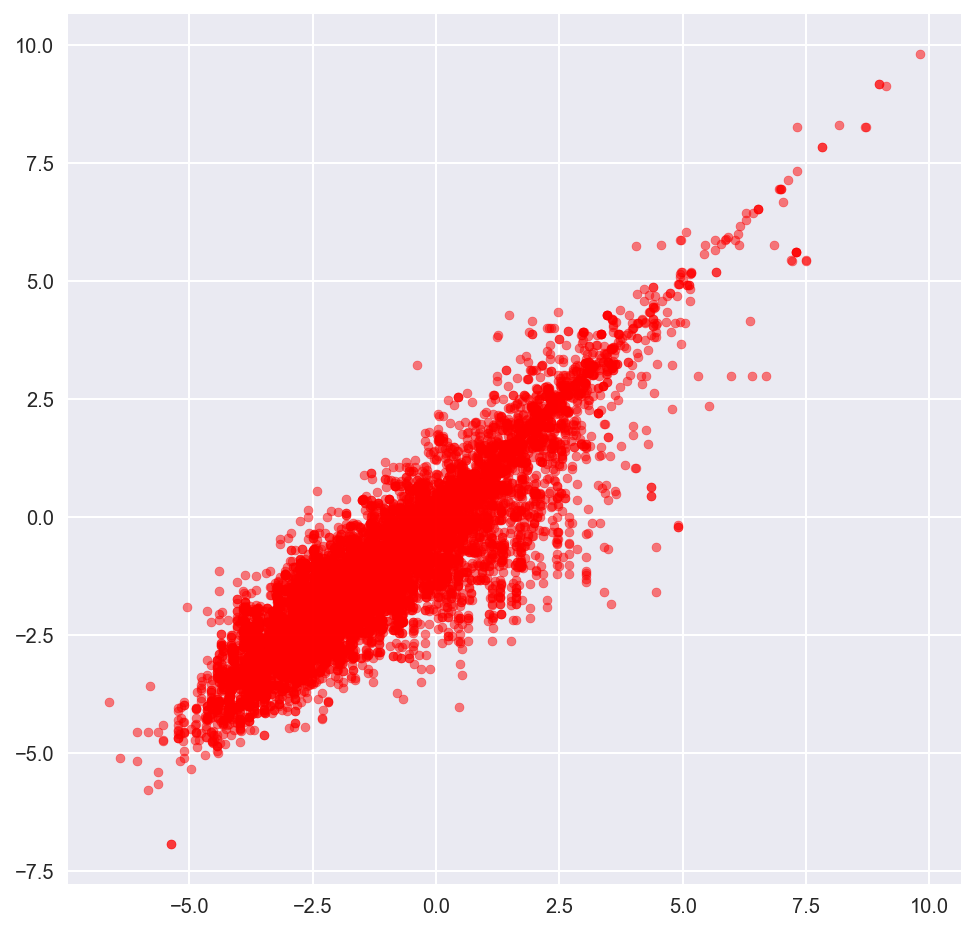

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(y_train,ols.predict(X_train),  color='r',alpha=0.5,s=20)

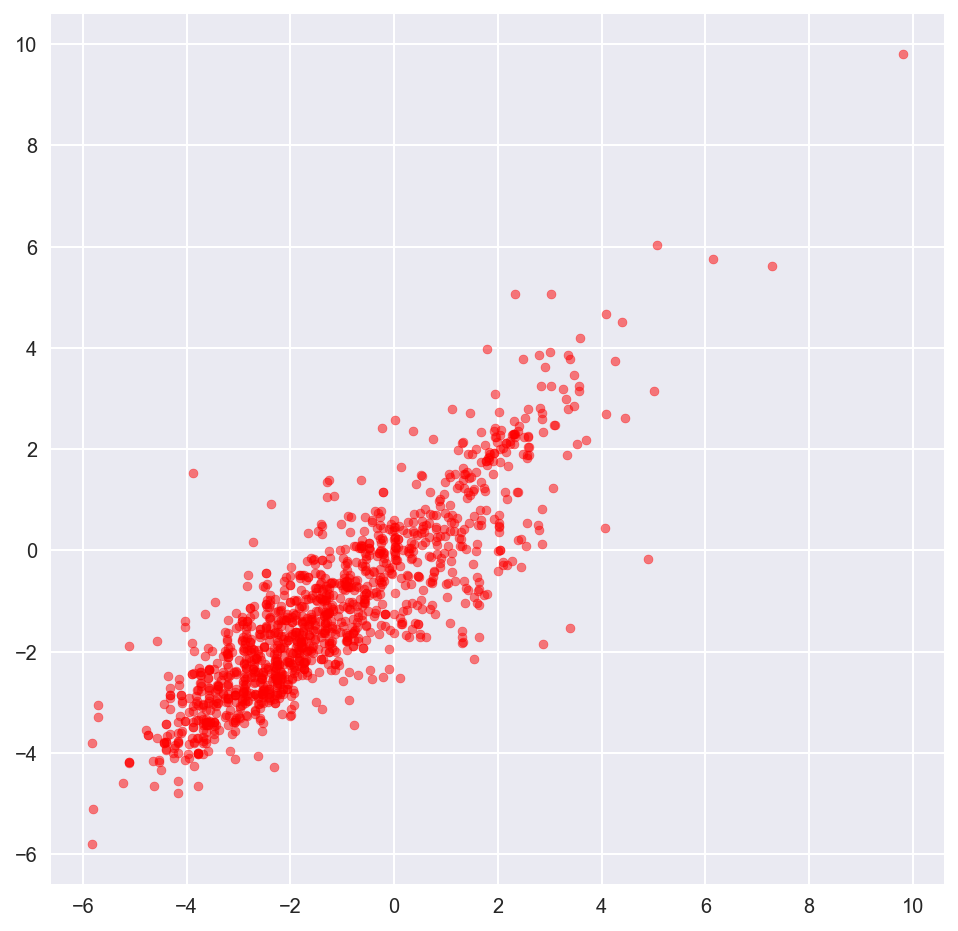

In [12]:
plt.figure(figsize=(8,8))
plt.scatter((y_test),(ols.predict(X_test)),  color='r',alpha=0.5,s=20)

In [ ]:
pred1=ols.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, pred1))
rms

In [16]:
pred=ols.predict(X_test)
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, pred))
rms

0.99659865109084844

In [ ]:
print("Mean squared root error: %.2f"
      % np.sqrt(((pred - y_test) ** 2).mean()))

print("Absultue average error: %.2f"
      % abs((pred - y_test)).mean())

In [17]:
# cross validation  grid search
import sklearn.model_selection as ms
scores = ms.cross_val_score(estimator=ols, X=x, y=y, cv=10)

In [18]:
scores

array([ -1.14371295e+10,   5.26530602e-01,   4.24236973e-01,
         6.03168405e-01,  -5.51908423e+12,  -1.46833089e+08,
        -8.58671180e+11,   3.68880373e-01,   4.66944674e-01,
        -1.21468350e+09])

In [ ]:
# Ridge regression and lasso regression

In [381]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

(array([  3.16491814e-06,   8.64679256e-01,   2.67999679e-01, ...,
         -7.59333087e-01,  -2.90243296e-01,   1.02688442e+00]),
 -63.028841026693129)

In [382]:
## determination
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))

The determination of ridge regression is: 0.7876


In [383]:
pred=ridge.predict(x)

rms = np.sqrt(mean_squared_error(y, pred))
rms

0.92334674513166926

import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)         # look at the scales
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [412]:
## coefficients
lasso = linear_model.Lasso(alpha=0.0001) # create a lasso instance
lasso.fit(x, y) # fit data

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

lasso = linear_model.LassoCV() 
lasso.fit(x, y)

# Lasso
from sklearn import preprocessing
X_scaled = preprocessing.scale(x)
lasso = linear_model.LassoCV()
lasso.fit(X_scaled, y) # fit data
lasso.coef_, lasso.intercept_,lasso.alpha_ # print out the coefficients

In [413]:
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([  3.01014551e-06,   8.01946933e-01,   3.14349924e-02, ...,
         -5.77076320e-01,  -0.00000000e+00,   8.87208983e-01]),
 -60.545373880575347)

In [414]:
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of lasso regression is: 0.7858


In [415]:
lasso_features = pd.DataFrame({'feature':x.columns,'coef':lasso.coef_})
lasso_features['abs']=lasso_features['coef'].abs()
lasso_features.sort_values('abs',ascending=False)

,coef,feature,abs
661,5.925994e+00,LABELERNAME__Cumberland Pharmaceuticals Inc.,5.925994e+00
350,5.512844e+00,"PHARM_CLASSES__Kinase Inhibitor [EPC],Protein ...",5.512844e+00
114,4.889093e+00,"PHARM_CLASSES__Alkylating Activity [MoA],Alkyl...",4.889093e+00
90,4.379797e+00,MARKETINGCATEGORYNAME__BLA,4.379797e+00
978,4.219276e+00,"LABELERNAME__Santarus, Inc.",4.219276e+00
388,4.046534e+00,"PHARM_CLASSES__Oxaborole Antifungal [EPC],Prot...",4.046534e+00
224,3.881775e+00,"PHARM_CLASSES__Cell Death Inducer [EPC],Increa...",3.881775e+00
882,3.779912e+00,"LABELERNAME__Otsuka America Pharmaceutical, Inc.",3.779912e+00
79,-3.571104e+00,ROUTENAME__ORAL; TOPICAL,3.571104e+00
183,3.514742e+00,"PHARM_CLASSES__Azole Antifungal [EPC],Azoles [...",3.514742e+00


# Tree method

In [23]:
from sklearn import tree

tree_model = tree.DecisionTreeRegressor()


tree_model.fit(X_train, y_train)

tree_model.score(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

0.9836407078977063

In [24]:
tree_model.score(X_test, y_test)

0.85780156590540657

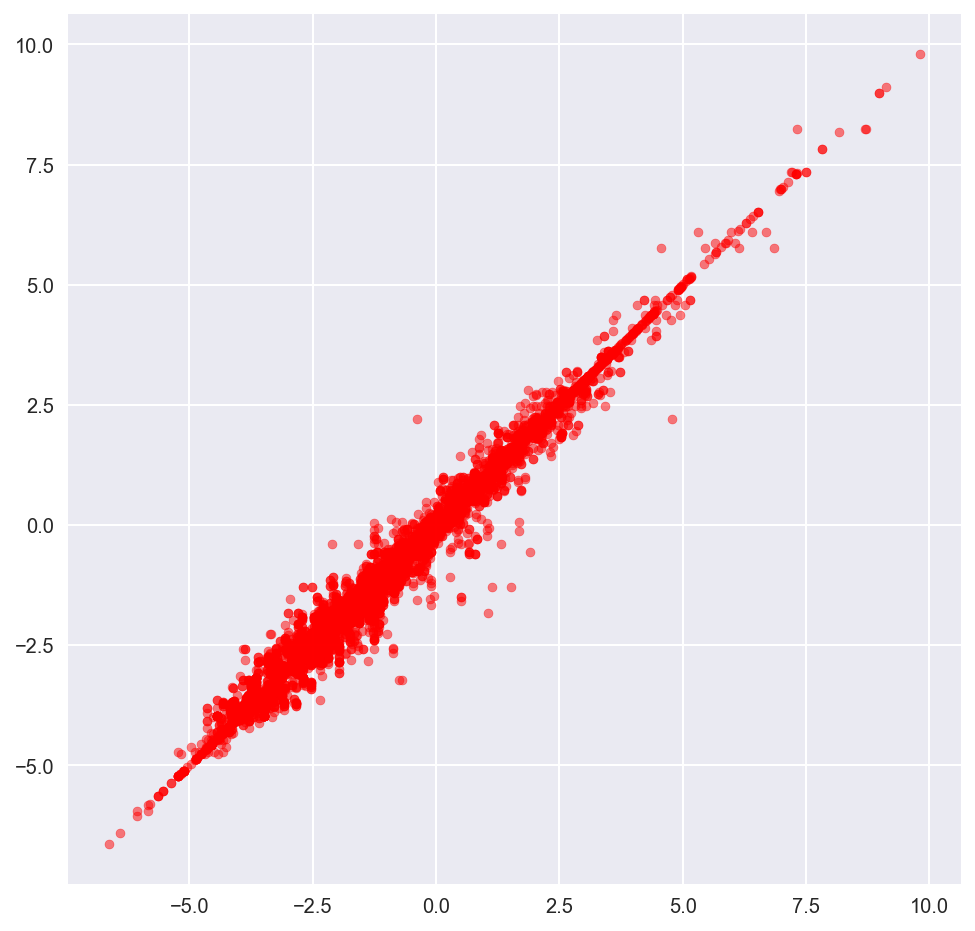

In [26]:
plt.figure(figsize=(8,8))
plt.scatter((y_train),(tree_model.predict(X_train)),  color='r',alpha=0.5,s=20)

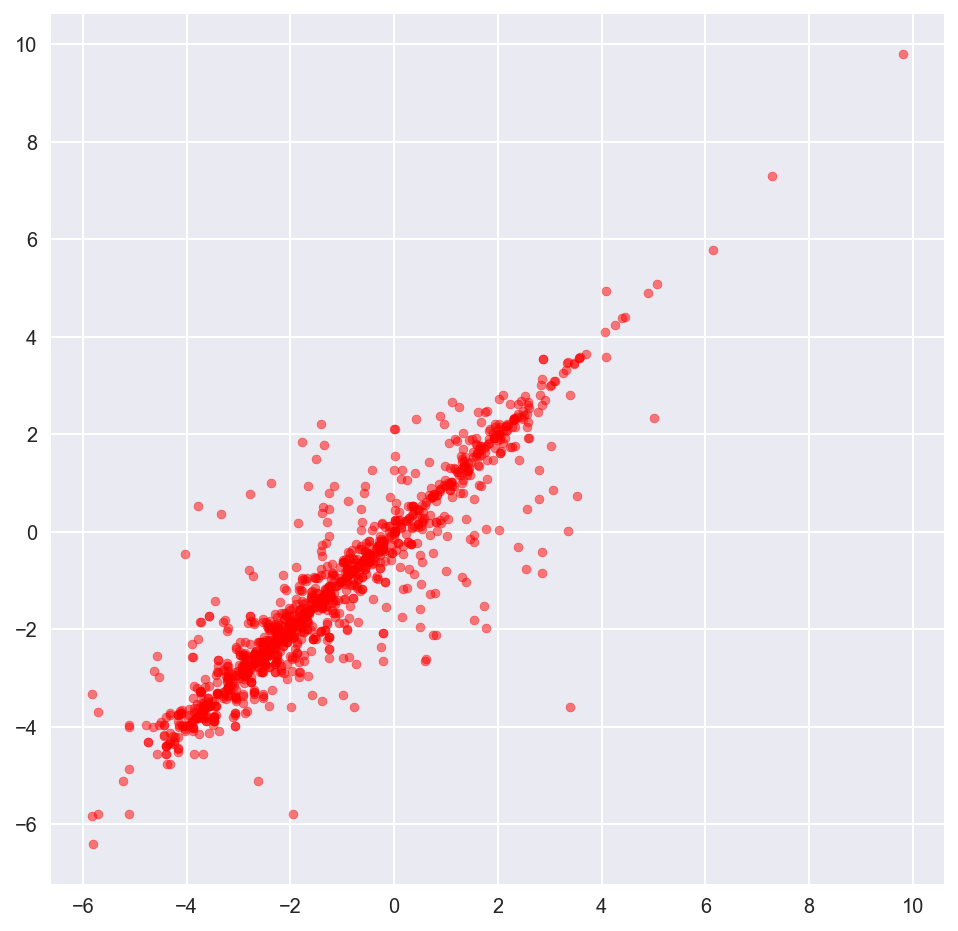

In [25]:
plt.figure(figsize=(8,8))
plt.scatter((y_test),(tree_model.predict(X_test)),  color='r',alpha=0.5,s=20)

In [29]:
pred1=tree_model.predict(X_test)

rms = np.sqrt(mean_squared_error(y_test, pred1))
rms

1.7047200498501509

In [27]:
tree_model.set_params(max_depth=2, min_samples_leaf=1)
tree_model.fit(X_train, y_train)
tree_model.score(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

0.27212268765470826

# Random forest

In [32]:
# random forest regression
regressor = RandomForestRegressor(n_estimators= 100 , oob_score =True, random_state = 42)
regressor.fit(X_train,y_train)
#regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [33]:
y_pred=regressor.predict(X_test)

In [34]:
# compute error 

#from sklearn.metrics import mean_squared_error
#rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
errorScore=np.sqrt(((y_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# error without log: 114.69
# error with log :0.68

Root Mean Squared error: 0.67


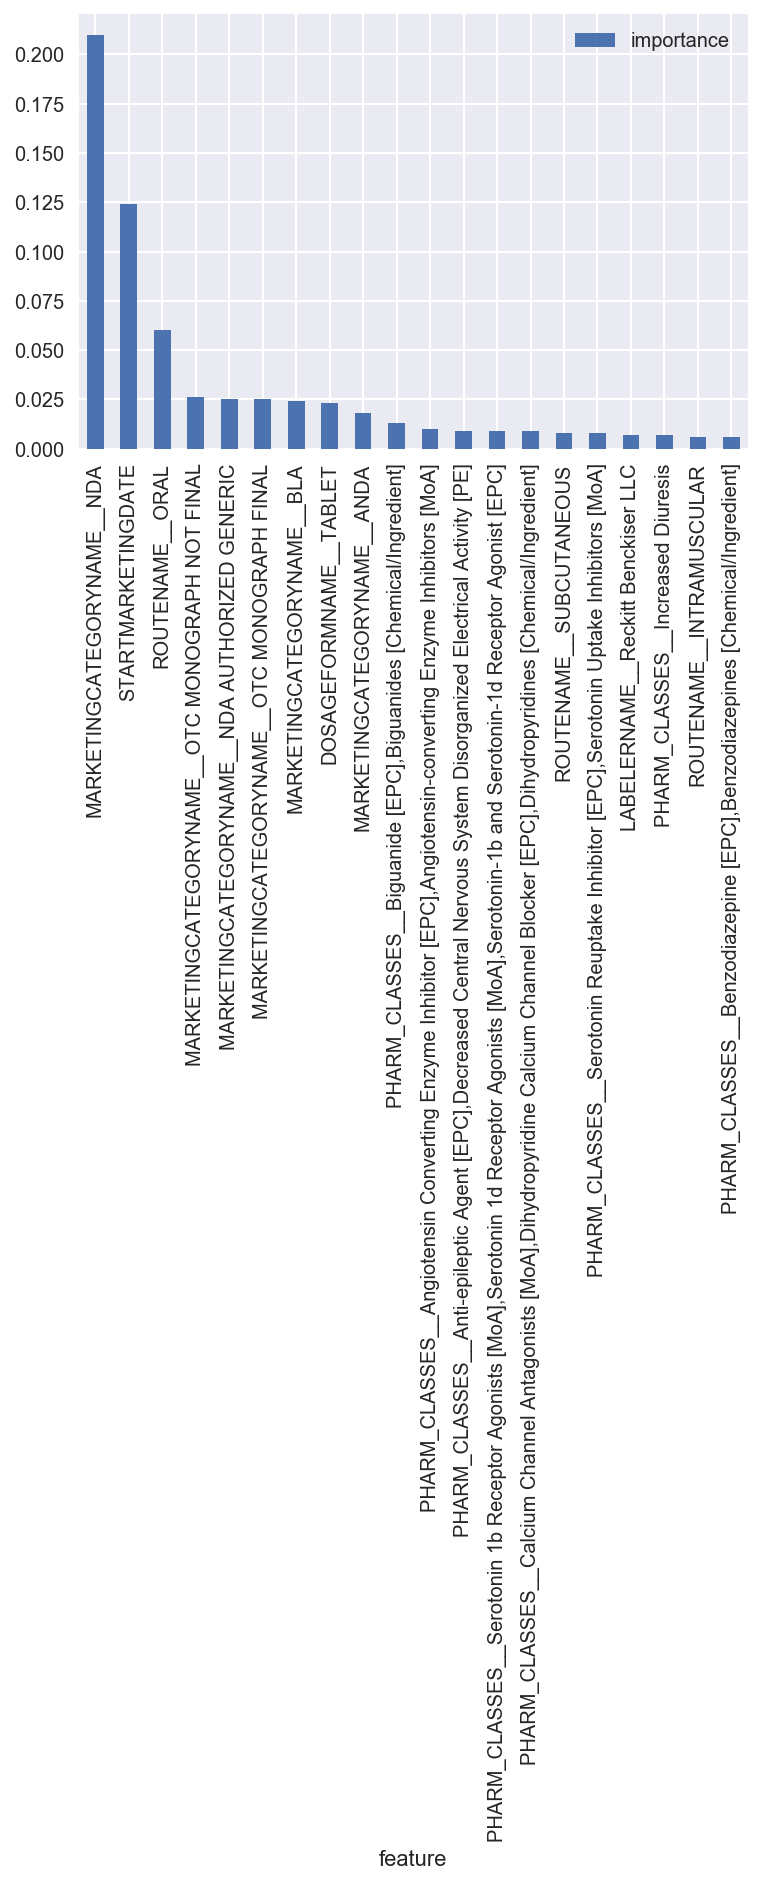

In [39]:
# random forest features importance
rf_importance = regressor.feature_importances_

#show to plot importances
rf_importancesDF = pd.DataFrame({'feature':x.columns,'importance':np.round(rf_importance,3)})
rf_importancesDF = rf_importancesDF.sort_values('importance',ascending=False).set_index('feature')
rf_importancesDF.head(20).plot.bar()

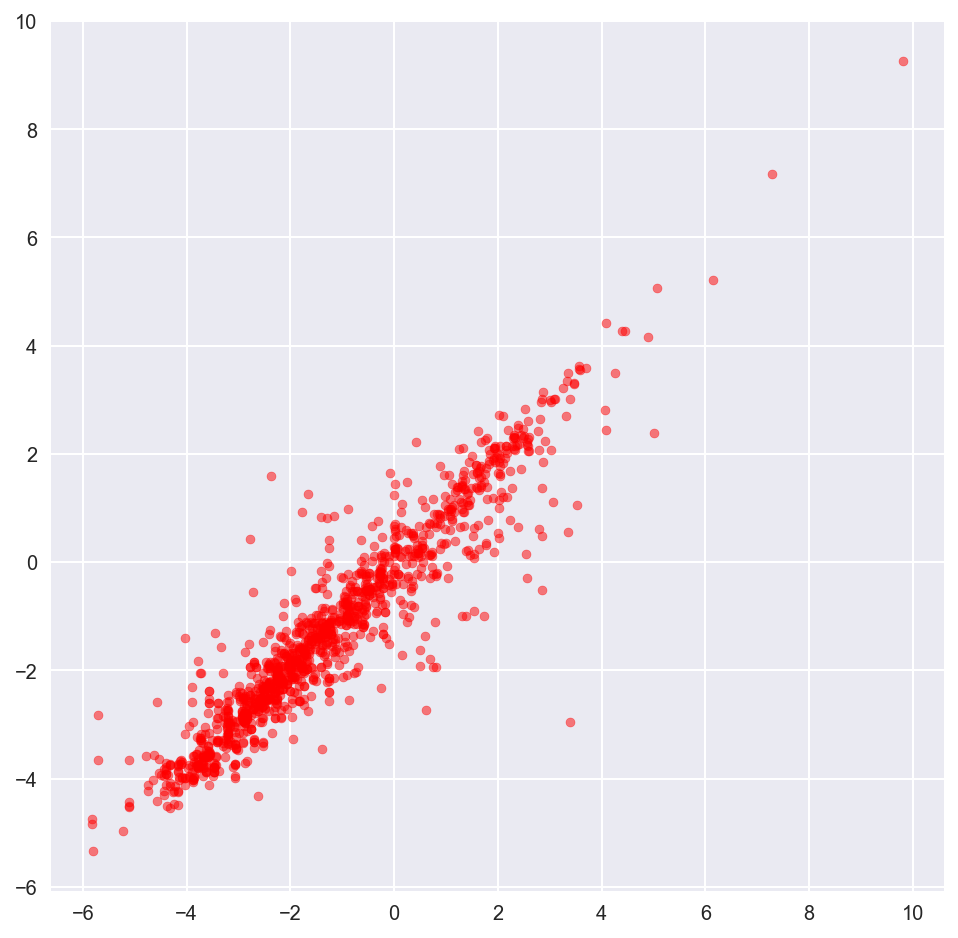

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,  color='r',alpha=0.5,s=20)

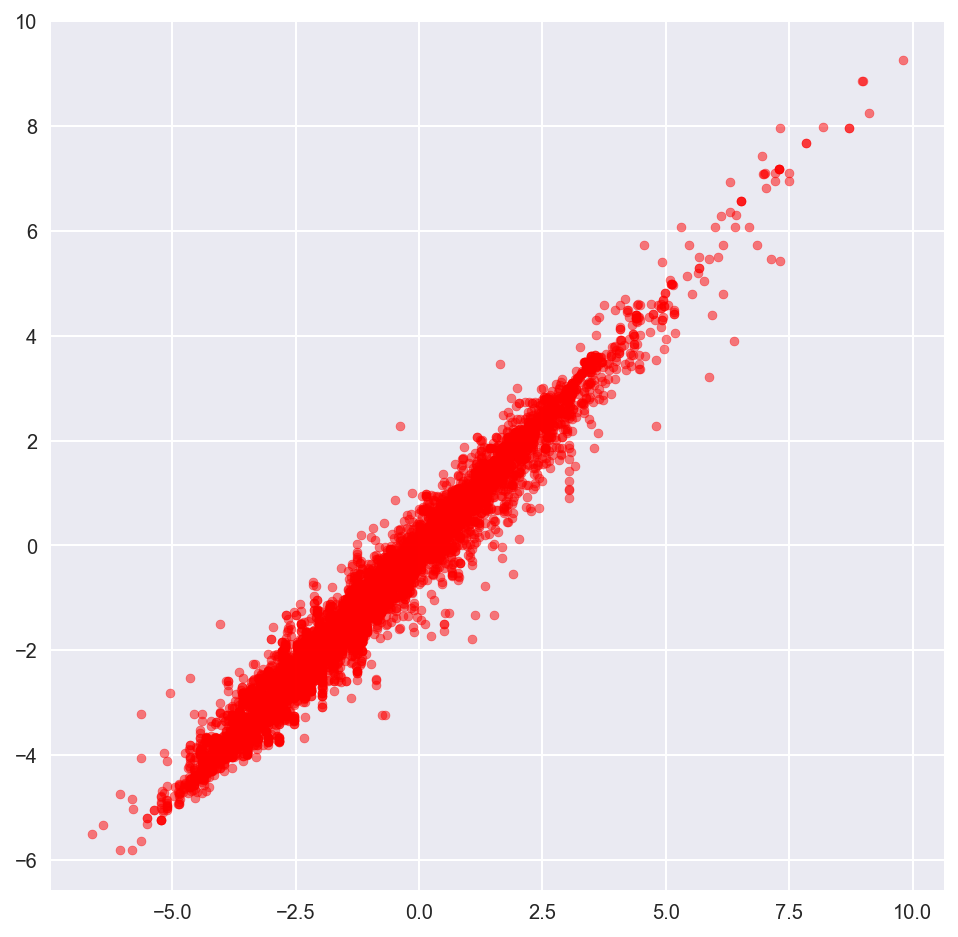

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(y_train,regressor.predict(X_train),color='r',alpha=0.5,s=20)

# XGboost

In [60]:
df=pd.read_csv('drugFEP.csv')
df.head()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
1,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878
2,SOLUTION,TOPICAL,Pharmacia and Upjohn Company LLC,19800620.0,"Decreased Sebaceous Gland Activity [PE],Lincos...",NDA,NaN,-1.748125,0.17410
3,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20030101.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381
4,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20161201.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381


In [61]:
y =df["logprice"]
x = df.iloc[:, 0:7]

In [62]:
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [63]:
# encoding categorical variables to factors
label_encoder = dict()

for feature in (df.select_dtypes(include=['object']).columns):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(x[feature])
    x.loc[:, feature] = label_encoder[feature].transform(x[feature])

encoding feature: DOSAGEFORMNAME


LabelEncoder()

encoding feature: ROUTENAME


LabelEncoder()

encoding feature: LABELERNAME


LabelEncoder()

encoding feature: PHARM_CLASSES


LabelEncoder()

encoding feature: MARKETINGCATEGORYNAME


LabelEncoder()

encoding feature: DEASCHEDULE


LabelEncoder()

In [64]:
X_train,X_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.1,random_state=42)
X_test.shape
X_train.shape

(1311, 7)

(11791, 7)

In [65]:
model_features=x.columns
model_features

Index([u'DOSAGEFORMNAME', u'ROUTENAME', u'LABELERNAME', u'STARTMARKETINGDATE',
       u'PHARM_CLASSES', u'MARKETINGCATEGORYNAME', u'DEASCHEDULE'],
      dtype='object')

In [66]:
dtrain = xgb.DMatrix(X_train, 
                    y_train,feature_names=model_features)


dtest = xgb.DMatrix(X_test,feature_names=model_features)



In [67]:
# higher learning rate
xgb_params = {
    'eta': 0.02,
    'max_depth': 5,
    'subsample': .8,
    'colsample_bytree': 0.7,
#    'lambda': 1.5, # l2 reg
    'eval_metric': 'rmse',
    
    'objective': 'reg:linear',
    'silent': 0
}

model = xgb.cv(xgb_params,
               dtrain=dtrain, 
               num_boost_round=3000,
                      nfold=5,
                      early_stopping_rounds=20,
                              verbose_eval=50)

[0]	train-rmse:2.57939+0.00779175	test-rmse:2.57949+0.0308731
[50]	train-rmse:1.64656+0.0102312	test-rmse:1.65942+0.0260993
[100]	train-rmse:1.37158+0.00821622	test-rmse:1.39622+0.0305796
[150]	train-rmse:1.26483+0.00944823	test-rmse:1.29931+0.031235
[200]	train-rmse:1.20756+0.00749828	test-rmse:1.25042+0.0324769
[250]	train-rmse:1.16554+0.00619246	test-rmse:1.21523+0.0338679
[300]	train-rmse:1.13202+0.00696494	test-rmse:1.18816+0.0325079
[350]	train-rmse:1.10139+0.00447361	test-rmse:1.16395+0.0331759
[400]	train-rmse:1.07428+0.00383949	test-rmse:1.14229+0.0340175
[450]	train-rmse:1.05128+0.00283071	test-rmse:1.12413+0.0340359
[500]	train-rmse:1.02929+0.00200777	test-rmse:1.10681+0.0340351
[550]	train-rmse:1.00962+0.00158197	test-rmse:1.09142+0.0332299
[600]	train-rmse:0.99053+0.00171995	test-rmse:1.07689+0.0335314
[650]	train-rmse:0.973493+0.000908511	test-rmse:1.06386+0.0322011
[700]	train-rmse:0.956249+0.00138212	test-rmse:1.05077+0.0317391
[750]	train-rmse:0.941191+0.000835585	test

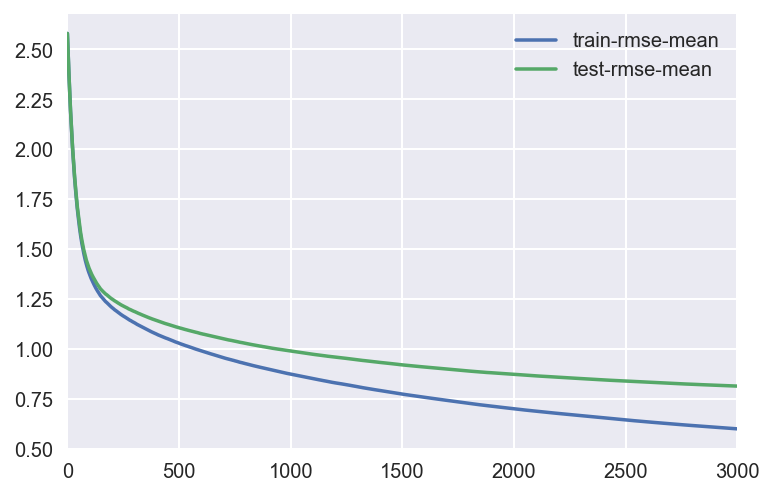

In [68]:
model[['train-rmse-mean', 'test-rmse-mean']].plot()

In [69]:
best_boost_rounds = len(model)
best_model = xgb.train(dict(xgb_params, silent=0), 
                       dtrain, num_boost_round= best_boost_rounds)

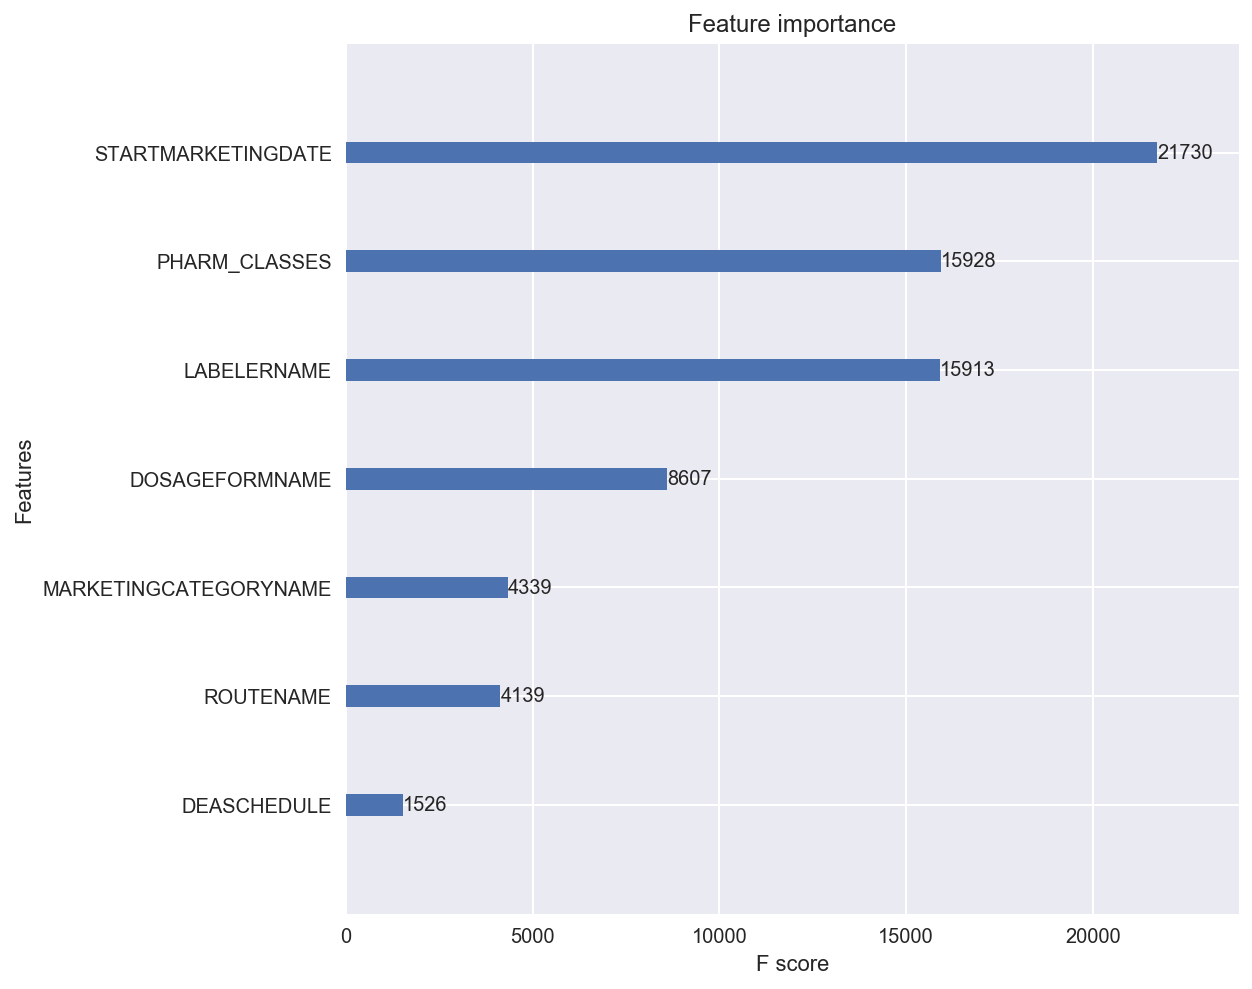

In [70]:
# plot feature importance 
fig, ax = plt.subplots(figsize=(8, 8))
xgb.plot_importance(best_model,ax=ax)
plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=10)  # fontsize of the figure title

In [71]:
# feature importance in table form
pd.DataFrame(best_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)


,feature,importance
1,STARTMARKETINGDATE,21730
6,PHARM_CLASSES,15928
3,LABELERNAME,15913
2,DOSAGEFORMNAME,8607
5,MARKETINGCATEGORYNAME,4339
4,ROUTENAME,4139
0,DEASCHEDULE,1526


In [72]:
xgb_pred = best_model.predict(dtest)
errorScore=np.sqrt(((xgb_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# Without log -Root Mean Squared error: 401.96
# With Log- Root Mean Squared error: 0.75

Root Mean Squared error: 0.77


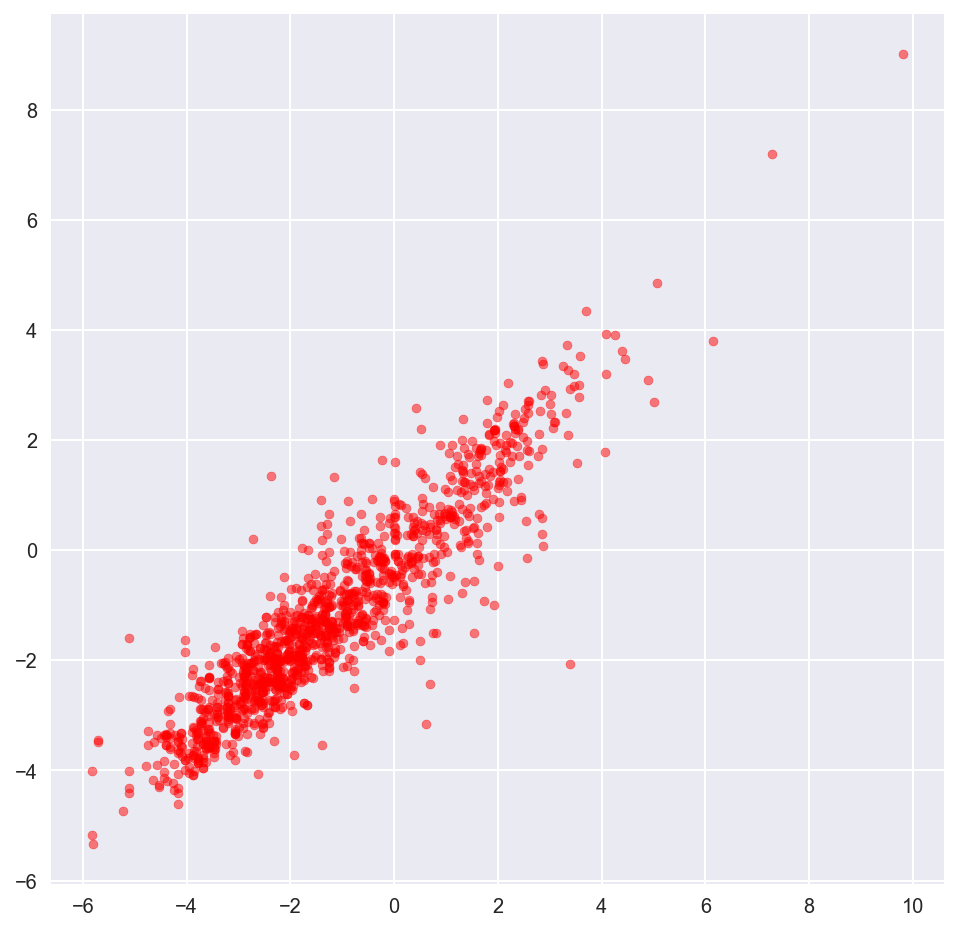

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,xgb_pred,color='r',alpha=0.5,s=20)

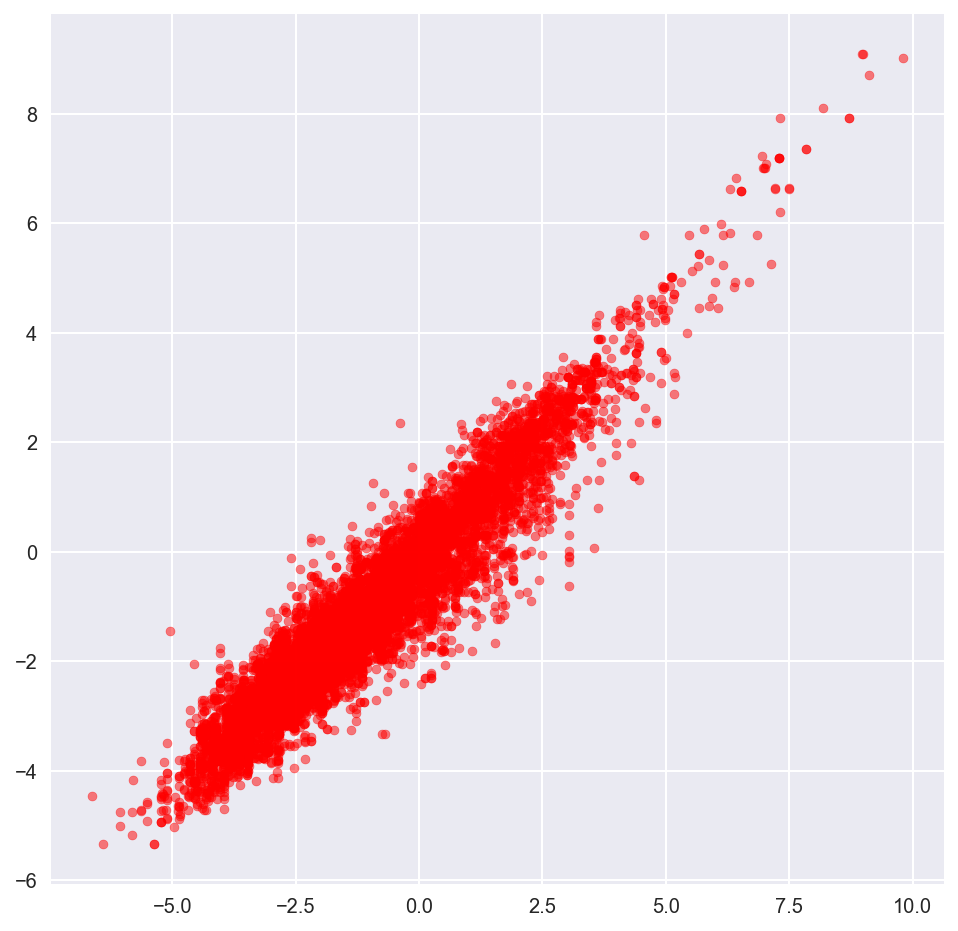

In [75]:
plt.figure(figsize=(8,8))
plt.scatter(y_train,best_model.predict(dtrain),color='r',alpha=0.5,s=20)

# Logistic Regression on Binary Classication

In [93]:
df=pd.read_csv('drugFEP.csv')
df.head(1)

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878


print(df['LABELERNAME'].value_counts(dropna=False))

In [78]:
len(df['LABELERNAME'].value_counts(dropna=False))   # labelername has 589 records
len(df['LABELERNAME'].unique())

589

589

In [94]:
df.describe()

,STARTMARKETINGDATE,logprice,price
count,1.310200e+04,13102.000000,13102.000000
mean,2.009674e+07,-1.188063,11.606463
std,7.111767e+04,2.003364,278.146418
min,1.947073e+07,-6.630124,0.001320
25%,2.007123e+07,-2.673069,0.069040
50%,2.011122e+07,-1.492589,0.224790
75%,2.014093e+07,0.024410,1.024710
max,2.017053e+07,9.813613,18280.916500


In [95]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()

In [96]:
def f(row):
    if (row['price'] > 10):
        return 1
    else:
        return 0
df['priceType'] = df.apply(f, axis=1)

df['priceType'].head()

0    0
1    0
2    0
3    1
4    1
Name: priceType, dtype: int64

In [97]:
df.head()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price,priceType
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878,0
1,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878,0
2,SOLUTION,TOPICAL,Pharmacia and Upjohn Company LLC,19800620.0,"Decreased Sebaceous Gland Activity [PE],Lincos...",NDA,NaN,-1.748125,0.17410,0
3,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20030101.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381,1
4,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20161201.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN,3.015722,20.40381,1


In [98]:
def Dummify(column):
    column_values = pd.get_dummies(df[column], prefix=column, prefix_sep='__')
    return pd.concat([df.drop(column,axis=1),column_values],axis=1)

df = Dummify('DOSAGEFORMNAME')
df = Dummify('ROUTENAME')
#df.head(2)
df = Dummify('MARKETINGCATEGORYNAME')
#df.head(2)
df = Dummify('PHARM_CLASSES')
#df.head(2)
df = Dummify('DEASCHEDULE')
df=Dummify('LABELERNAME')
#df=Dummify('Classification_for_Rate_Setting')
#df=Dummify('OTC')
#df=Dummify('Explanation_Code')
df.head(2)

,STARTMARKETINGDATE,logprice,price,priceType,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CREAM,DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__SHAMPOO,DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SUGAR COATED",ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRADERMAL,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SUBLINGUAL,ROUTENAME__TOPICAL,ROUTENAME__TRANSDERMAL,ROUTENAME__VAGINAL,MARKETINGCATEGORYNAME__ANDA,MARKETINGCATEGORYNAME__BLA,MARKETINGCATEGORYNAME__NDA,MARKETINGCATEGORYNAME__NDA AUTHORIZED GENERIC,MARKETINGCATEGORYNAME__OTC MONOGRAPH FINAL,MARKETINGCATEGORYNAME__OTC MONOGRAPH NOT FINAL,MARKETINGCATEGORYNAME__UNAPPROVED DRUG OTHER,"PHARM_CLASSES__5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase Inhibitors [MoA],Decreased Leukotriene Production [PE]","PHARM_CLASSES__5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA]","PHARM_CLASSES__5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA],Adrenergic alpha-Antagonists [MoA],alpha-Adrenergic Blocker [EPC]","PHARM_CLASSES__Acetyl Aldehyde Dehydrogenase Inhibitors [MoA],Aldehyde Dehydrogenase Inhibitor [EPC]","PHARM_CLASSES__Acidifying Activity [MoA],Calculi Dissolution Agent [EPC],Anti-coagulant [EPC],Decreased Coagulation Factor Activity [PE],Calcium Chelating Activity [MoA]","PHARM_CLASSES__Adrenergic Agonists [MoA],Adrenergic Receptor Agonist [EPC],Decreased Histamine Release [PE],Histamine H1 Receptor Antagonists [MoA],Histami

In [99]:
df = df.drop(['price','logprice'],axis=1)

In [100]:
df.shape

(13102, 1087)

# unbalanced outcomes!
https://stackoverflow.com/questions/14863125/sklearn-logistic-regression-with-unbalanced-classes

In [101]:
y = df["priceType"]
x = df.loc[:, df.columns != 'priceType']

In [102]:
X_train,X_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.1,random_state=42)
X_test.shape
X_train.shape

(1311, 1086)

(11791, 1086)

In [103]:
X_train.head(1)
y_train.head(1)

,STARTMARKETINGDATE,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CREAM,DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__SHAMPOO,DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SUGAR COATED",ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRADERMAL,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SUBLINGUAL,ROUTENAME__TOPICAL,ROUTENAME__TRANSDERMAL,ROUTENAME__VAGINAL,MARKETINGCATEGORYNAME__ANDA,MARKETINGCATEGORYNAME__BLA,MARKETINGCATEGORYNAME__NDA,MARKETINGCATEGORYNAME__NDA AUTHORIZED GENERIC,MARKETINGCATEGORYNAME__OTC MONOGRAPH FINAL,MARKETINGCATEGORYNAME__OTC MONOGRAPH NOT FINAL,MARKETINGCATEGORYNAME__UNAPPROVED DRUG OTHER,"PHARM_CLASSES__5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase Inhibitors [MoA],Decreased Leukotriene Production [PE]","PHARM_CLASSES__5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA]","PHARM_CLASSES__5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA],Adrenergic alpha-Antagonists [MoA],alpha-Adrenergic Blocker [EPC]","PHARM_CLASSES__Acetyl Aldehyde Dehydrogenase Inhibitors [MoA],Aldehyde Dehydrogenase Inhibitor [EPC]","PHARM_CLASSES__Acidifying Activity [MoA],Calculi Dissolution Agent [EPC],Anti-coagulant [EPC],Decreased Coagulation Factor Activity [PE],Calcium Chelating Activity [MoA]","PHARM_CLASSES__Adrenergic Agonists [MoA],Adrenergic Receptor Agonist [EPC],Decreased Histamine Release [PE],Histamine H1 Receptor Antagonists [MoA],Histamine-1 Receptor Inhibitor [

9886    0
Name: priceType, dtype: int64

In [108]:
logit_1.set_params(C=1e4,class_weight="balanced")

logit_1.fit(X_train, y_train)


LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [109]:
print(logit_1.score(x, y))

0.888795603725


In [115]:
logit = linear_model.LogisticRegression()
logit.set_params(C=1e4,class_weight="balanced")
scores = ms.cross_val_score(estimator=logit, X=X_train, y =y_train, cv=5)   # five folds

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Scores: [ 0.91055532  0.93681086  0.94105174  0.89100933  0.91603053]
Score mean: 0.919091555952
Score std deviation: 0.0182596376793


In [116]:
stratify_divide = ms.StratifiedKFold(n_splits=5, random_state=0)     #put into the next step
logit.set_params(C=1e4,class_weight="balanced")
scores1 = ms.cross_val_score(estimator=logit, X=X_train, y =y_train, cv=stratify_divide)
print('Scores: {}'.format(scores1))
print('Score mean: {}'.format(scores1.mean()))
print('Score std deviation: {}'.format(scores1.std()))

LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Scores: [ 0.91055532  0.93681086  0.94105174  0.89100933  0.91603053]
Score mean: 0.919091555952
Score std deviation: 0.0182596376793


In [117]:
mean_error = []
std_error = []
kfold = range(3, 11)
for i in kfold:
    scores = ms.cross_val_score(logit, X=X_train, y =y_train, cv=i)
    mean_error.append(1 - scores.mean())
    std_error.append(scores.std())

(0, 12)

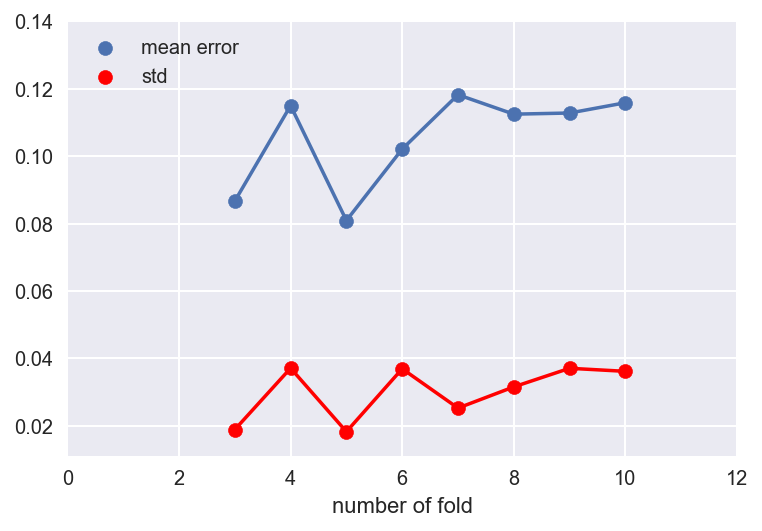

In [118]:
import matplotlib.pyplot as plt                                     # if too manu folds, std increase, beacuse the test set is used up
s1 = plt.scatter(kfold, mean_error, label='mean error')              
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std')
plt.plot(kfold, std_error, color='red')
plt.xlim(0, 12)
plt.xlabel('number of fold')
plt.legend(handles=[s1, s2], loc=2)
plt.show()

from sklearn import linear_model                  # sitll in the linear model
logit_1 = linear_model.LogisticRegression()
logit_1.get_params()  


logit_1.predict([[3], [4]]) 
logit_1.predict_proba([[3], [4]])
print(decision_logit.intercept_)
print(decision_logit.coef_)


In [120]:
logit.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logit.predict(X_test))

LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

array([[1112,  127],
       [  13,   59]])

In [121]:

pd.crosstab(y_test, logit.predict(X_test))

col_0,0,1
priceType,,
0,1112,127
1,13,59


In [123]:
type(logit.predict(X_test))

numpy.ndarray

In [124]:
ypred=pd.DataFrame(logit.predict(X_test))

In [125]:
ypred[0].value_counts(dropna=False)

0    1125
1     186
Name: 0, dtype: int64

In [122]:
y_test.value_counts(dropna=False)

0    1239
1      72
Name: priceType, dtype: int64

# Tree method


In [126]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(class_weight='balanced')


tree_model.fit(X_train, y_train)


tree_model.score(X_train, y_train)





DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.99084047154609445

In [127]:

tree_model.score(X_test, y_test)

0.97330282227307396

In [128]:
pd.crosstab(y_test, tree_model.predict(X_test))

col_0,0,1
priceType,,
0,1214,25
1,10,62


# Random Forest

In [131]:
randomForest.set_params(random_state=42)
randomForest.fit(X_train,y_train) # fit 
randomForest.score(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.99041641930285806

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, randomForest.predict(X_test))

array([[1227,   12],
       [  19,   53]])

In [133]:
randomForest.score(X_test,y_test)

0.97635392829900836

# feature importamce 
list(zip(x.columns, randomForest.feature_importances_))[1:20]

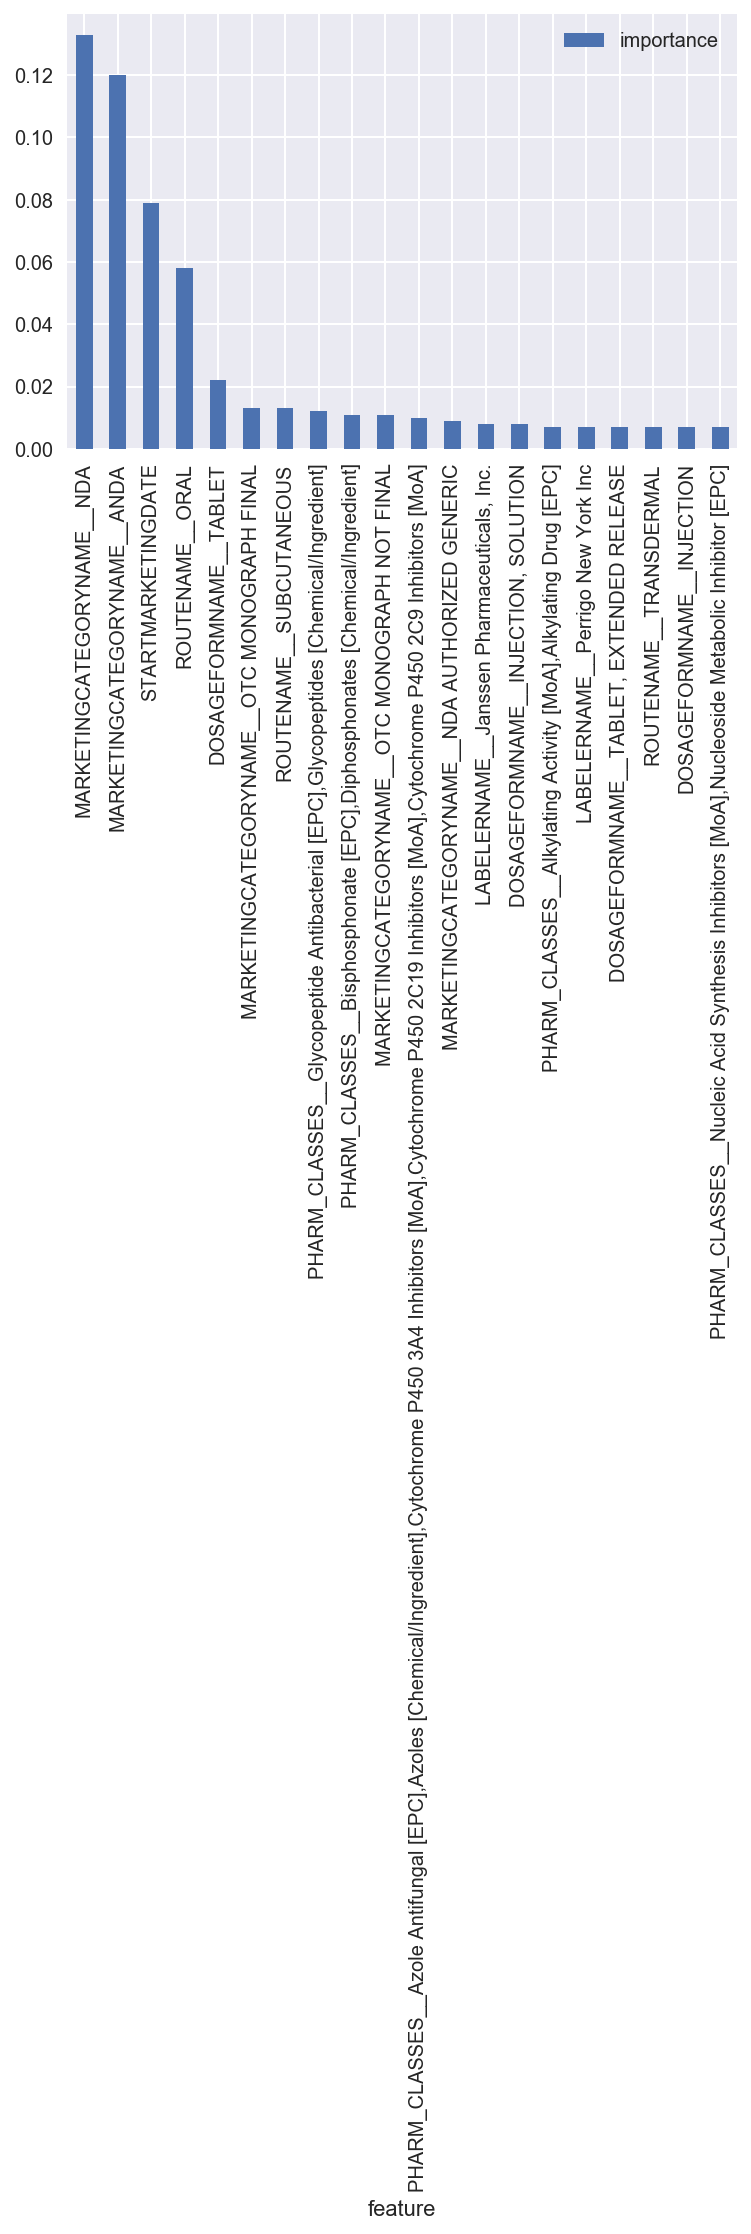

In [134]:
plt.figure(figsize=(18,6))
# random forest features importance
rf_importance = randomForest.feature_importances_

#show to plot importances
rf_importancesDF = pd.DataFrame({'feature':x.columns,'importance':np.round(rf_importance,3)})
rf_importancesDF = rf_importancesDF.sort_values('importance',ascending=False).set_index('feature')
rf_importancesDF.head(20).plot.bar()

# XGboost classfier

In [181]:
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [182]:
df=pd.read_csv('drugFEP.csv')

In [183]:
def f(row):
    if (row['price'] > 10):
        return 1
    else:
        return 0
df['priceType'] = df.apply(f, axis=1)

df['priceType'].head()

0    0
1    0
2    0
3    1
4    1
Name: priceType, dtype: int64

In [156]:
df.head(1)

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice,price,priceType
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075,0.02878,0


In [186]:

y = df["priceType"]
x = df.iloc[:, 0:7]


In [187]:
x.head()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE
0,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN
1,"INJECTION, SUSPENSION",ORAL; TOPICAL,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN
2,SOLUTION,TOPICAL,Pharmacia and Upjohn Company LLC,19800620.0,"Decreased Sebaceous Gland Activity [PE],Lincos...",NDA,NaN
3,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20030101.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN
4,"PATCH, EXTENDED RELEASE",TRANSDERMAL,Baxter Healthcare Corporation,20161201.0,"Anticholinergic [EPC],Cholinergic Antagonists ...",NDA,NaN


In [188]:
label_encoder = dict()

for feature in (df.select_dtypes(include=['object']).columns):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(x[feature])
    x.loc[:, feature] = label_encoder[feature].transform(x[feature])

encoding feature: DOSAGEFORMNAME


LabelEncoder()

encoding feature: ROUTENAME


LabelEncoder()

encoding feature: LABELERNAME


LabelEncoder()

encoding feature: PHARM_CLASSES


LabelEncoder()

encoding feature: MARKETINGCATEGORYNAME


LabelEncoder()

encoding feature: DEASCHEDULE


LabelEncoder()

In [189]:
# 0.1 test size

X_train,X_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.1,random_state=42)
X_train.shape
y_train.shape


X_test.shape

y_test.shape

(11791, 7)

(11791,)

(1311, 7)

(1311,)

In [190]:
# 0.2 of train size for val data 
size_=int(0.1*len(X_train))
size_

1179


X_train_sub, Y_train_sub = X_train[:-size_],  y_train[:-size_]
X_val, Y_val = X_train[-size_:],  y_train[-size_:]

# check no. of rows and columsn
X_train_sub.shape
Y_train_sub.shape
X_val.shape
Y_val.shape
X_train.head()

In [191]:
model_features=x.columns
model_features

Index([u'DOSAGEFORMNAME', u'ROUTENAME', u'LABELERNAME', u'STARTMARKETINGDATE',
       u'PHARM_CLASSES', u'MARKETINGCATEGORYNAME', u'DEASCHEDULE'],
      dtype='object')

In [192]:

dtrain = xgb.DMatrix(X_train, 
                    y_train,feature_names=model_features)


dtest = xgb.DMatrix(X_test,feature_names=model_features)



In [237]:
#'eta': 0.02,
 #   'max_depth': 5,

   # 'colsample_bytree': 0.7,
# fit model no training data
xgbModel = XGBClassifier(max_depth=16,learning_rate=0.1,subsample=1)  # iteration
xgbModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=16,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [238]:

# make predictions for test data
xgb_pred = xgbModel.predict(X_test)
xgb_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [239]:

accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: %.2f%%" % (accuracy * 100.0))

XGBoost Accuracy: 97.48%


In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test)
confusion_matrix(xgb
                 _pred, xgb_pred)
confusion_matrix(y_test, xgb_pred)

array([[1239,    0],
       [   0,   72]])

array([[1250,    0],
       [   0,   61]])

array([[1228,   11],
       [  22,   50]])

#http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/